# Options Strategies Demo

This notebook demonstrates how to use the `options_pricing.strategies` module
to build and visualize **common option strategies**.

We will:
1. Define a few strategies (straddle, strangle, spreads, butterfly).
2. Plot payoff diagrams at maturity.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman" # Set font to Times New Roman
import sys
import os

# Add the repo root (one level up from notebooks) to Python path
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(repo_root)


from options_pricing import strategies


## 1. Define Underlying Parameters
We’ll assume an initial stock price around 100, and construct strategies across
a grid of possible maturity prices.


In [2]:

S = np.linspace(50, 150, 200) # Price range at maturity
K = 100      # strike
T = 1.0      # time to maturity (in years)
r = 0.05     # risk-free interest rate
sigma = 0.2  # volatility


## 2. Payoff Diagrams for Common Strategies


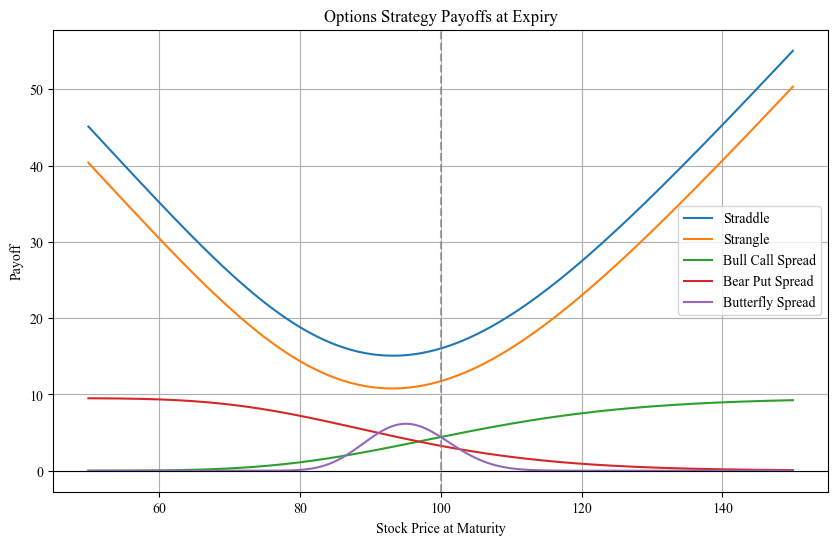

In [3]:
strategies_dict = {
    "Straddle": strategies.straddle(S, K, T, r, sigma),
    "Strangle": strategies.strangle(S, K-5, K+5, T, r, sigma),
    "Bull Call Spread": strategies.bull_call_spread(S, K, K+10, T, r, sigma),
    "Bear Put Spread": strategies.bear_put_spread(S, K, K-10, T, r, sigma),
    "Butterfly Spread": strategies.butterfly_spread(S, K-10, K, K+10, T, r, sigma)
}

plt.figure(figsize=(10,6))
for name, payoff in strategies_dict.items():
    plt.plot(S, payoff, label=name)

plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(K, color="gray", linestyle="--", alpha=0.7)
plt.title("Options Strategy Payoffs at Expiry")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()


## 3. Strategy-by-Strategy Breakdown
### Straddle
A **long straddle** combines a call and a put with the same strike.  
It profits from **large moves** in either direction.


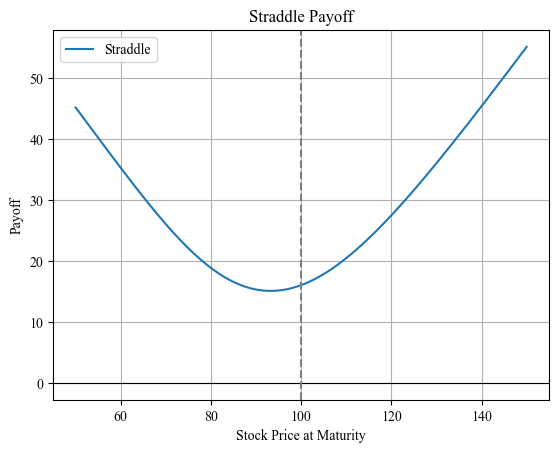

In [4]:
plt.plot(S, strategies.straddle(S, K, T, r, sigma), label="Straddle")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(K, color="gray", linestyle="--")
plt.title("Straddle Payoff")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()


### Strangle
A **long strangle** buys an out-of-the-money call and put.  
Cheaper than a straddle, but requires a **larger move** to profit.


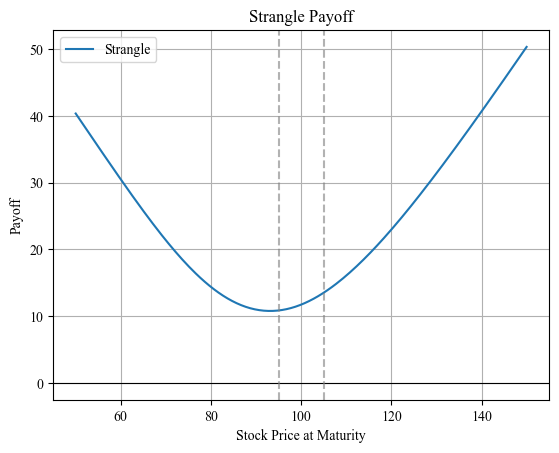

In [5]:
plt.plot(S, strategies.strangle(S, K-5, K+5, T, r, sigma), label="Strangle")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(K-5, color="gray", linestyle="--", alpha=0.6)
plt.axvline(K+5, color="gray", linestyle="--", alpha=0.6)
plt.title("Strangle Payoff")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()


### Bull Call Spread
A **bull call spread** profits from moderate upside, with limited risk and reward.


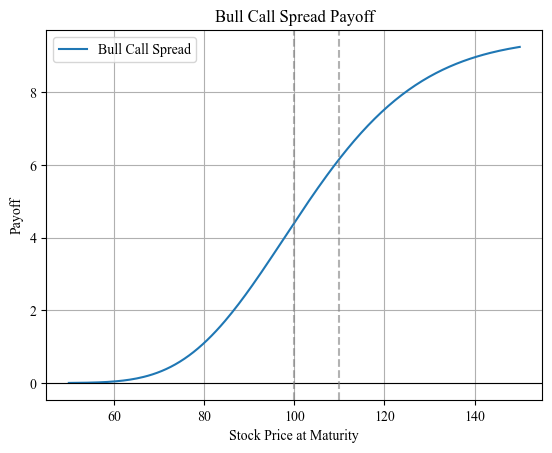

In [6]:
plt.plot(S, strategies.bull_call_spread(S, K, K+10, T, r, sigma), label="Bull Call Spread")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(K, color="gray", linestyle="--", alpha=0.6)
plt.axvline(K+10, color="gray", linestyle="--", alpha=0.6)
plt.title("Bull Call Spread Payoff")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()


### Bear Put Spread
A **bear put spread** profits from moderate downside, with limited risk and reward.


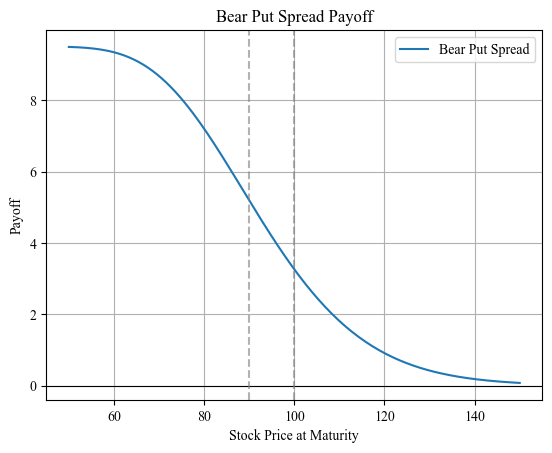

In [7]:
plt.plot(S, strategies.bear_put_spread(S, K, K-10, T, r, sigma), label="Bear Put Spread")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(K-10, color="gray", linestyle="--", alpha=0.6)
plt.axvline(K, color="gray", linestyle="--", alpha=0.6)
plt.title("Bear Put Spread Payoff")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()


### Butterfly Spread
A **butterfly spread** profits if the underlying stays near the middle strike,  
making it a **low-volatility strategy**.


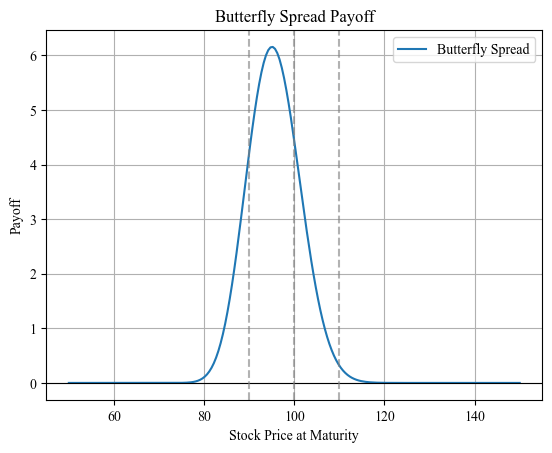

In [8]:
plt.plot(S, strategies.butterfly_spread(S, K-10, K, K+10, T, r, sigma), label="Butterfly Spread")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(K-10, color="gray", linestyle="--", alpha=0.6)
plt.axvline(K, color="gray", linestyle="--", alpha=0.6)
plt.axvline(K+10, color="gray", linestyle="--", alpha=0.6)
plt.title("Butterfly Spread Payoff")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()


# Summary
- We plotted payoff diagrams for several common strategies.
- Each strategy offers a distinct **risk/reward profile**.
- These serve as building blocks for more advanced hedging and trading strategies.
